In [1]:
#Task done by Manaswi Anantharaju

In [15]:
#Task 2: Prediction using Unsupervised Machine Learning
#From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [16]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [17]:
iris = pd.read_csv("iris.csv")

In [23]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
iris.shape

(150, 6)

In [21]:
#data pre-processing
x=iris.drop(['Id','Species'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
#finding number of clusters using k-means algorithm

In [8]:
x = iris.iloc[:,[0,1,2,3]].values

In [23]:
#elbow-method
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.34492380952381,
 46.535582051282056,
 41.79530692640693,
 34.19068792479663,
 30.07604854224935,
 28.068709902818604]

Text(0, 0.5, 'Within Clusters Sum of squares')

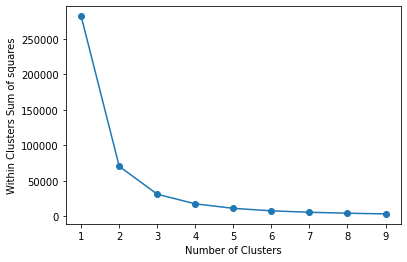

In [12]:
#plotting a graph 
nu_clusters=range(1,10)
plt.plot(nu_clusters,wcss,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of squares')

In [24]:
#observing above graph,elbow is at 3
kmeans = KMeans(n_clusters=3,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [25]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
#clusters

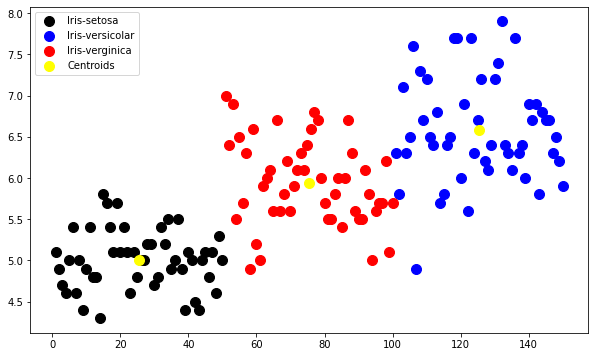

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100,c='black',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100,c='blue',label='Iris-versicolar')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100,c='red',label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')
plt.legend()